# II Automatic differentiation

## Topics

Part 1 (1:00:00):<br>
<code>**1: Automatic differentiation overview**</code><br>
<code>**2: Learning more about PyTorch**</code><br>
<code>**3: Understanding automatic differentiation via computation graphs**</code><br>
<code>**4: Coding in PyTorch**</code><br>

Part 2 (01:10:00):<br>
<code>**5: Training ADALINE with PyTorch**</code><br>
<code>**6: Closer look at PyTorch API**</code><br>
<code>**7: GPU resources and Google colab**</code><br>

We went through Gradient descent and some topics over calculus to understand how can we compute the partial derivative of a loss function with respect to the weights of the model so that we can optimize the model to do good predictions. This is very important to understand from bottom up perspective like why and how we compute gradients. However in practice especially when we work with big neural networks it will be very tedious to implement these gradients by hand deriving loss function manually. So we will use PyTorch to make our life easier. In PyTorch therese is a submodule called <code>**autograd**</code> which is a module for automatic differentiation and as the name implies it will automatically derive the loss function with respect to weights for us. We will go through essentially to look how this works and we will continue to use all the time working with other more complicated neural networks like convoliutional neural network (CNN), recurrent neural networks (RNN).

### Goals overall

Computing partial derivatives more easily and automatically with PyTorch.<br>
We will go through:
 - PyTorch resources
 - Computation graphs
 - Automatic differentiation in PyTorch
 - Training ADALINE manually vs automatically in PyTorch
 - A closer look at the PyTorch API

<code>**[PyTorch](https://pytorch.org)**</code> is a DL library for python and it is quite similar to NumPy, like PyTorch tensors are similar to NumPy ndarrays, essentially the same thing. But beyond that PyTorch has some convenience functions for DL. <br>

<code>**At a glance**</code>
 - Focuses on flexibility for research and minimizing cognitive overhead
 - Dynamic nature of autograd API inspired by Chainer library (pioneers of this API)
 - Core features:
     - Automatic diferentiation (no more math)
     - Dynamic computation graps
     - NumPy integration
     
 - Written in C++ and CUDA (CUDA is like C++ for the GPU)
 - Python in the usability glue
 
<code>**PyTorch vs NumPy**</code>
 - Support GPU
 - Distribute ops across multiple devices
 - Keep track of computation graph and ops that created them

## Computation graphs

Its a graph of calculation that we exectute on PyTorch. When we implement NN there will be two methods <code>**forward**</code> and <code>**backward**</code>. The former constructs the graph and then later computes gradients by walking backward. Based on the output we compute the derivatives of the output or the loss with respect to these inputs for example the weights that we want to update. We will go through this graph conceptually before we see how pytorch handles that. 
<br>
<code>**In the context of deep learning and PyTorch it is helpful to think about neural networks as computationa graphs**</code>. NN is juts a chain of computations like nested computations.

Suppose we have the following activation function <code>**ReLU Rectified Linear Unit**</code> probably the most commonly used activation function in DL.

\begin{multline*}
a(x, w, b) = relu(w \cdot x + b)
\end{multline*}

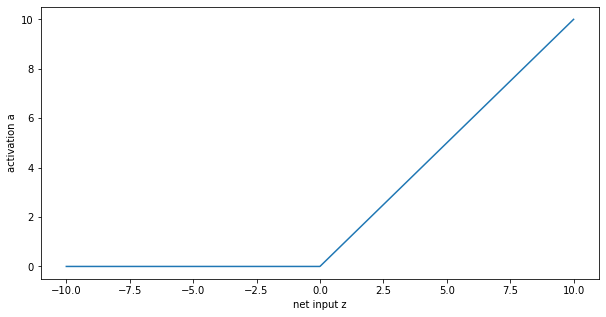

In [11]:
%run ../code_examples/visualize/relu_sample.py

\begin{multline*}
\text{relu}(z) =
\left\{\begin{matrix}
z && \text{if}\ z > 0 \\
0 && \text{otherwise}
\end{matrix}\right.
\end{multline*}


If you recal ADALINE model, mostly we had was a computation that computed the net input which was then passed on to a threshold function. 

\begin{multline*}
\sigma(w \cdot x + b)
\end{multline*}

\begin{multline*}
\sigma(z) = z
\end{multline*}

In ADALINE this activation function was just an identity function basically doing nothig.But now 𝜎 is not a identity function and more interesting Relu function. It takes the net input at behave quite like a linear function but actually not. It returns z if the input is greater than 0 and 0 otherwise. The rising region is indetinty function and the left side until 0.0 is doing nothing, its clipped.

It useful in the context of deep learning essentially for having nin linearity in the multilayer neural network , otherwise with multiple linear functions the combination of those would be also a linear function. In a sense our netwrok won't be able to apporixamte non linear functions. 

### Side note bout ReLu function

<code>**You may note that**</code>

\begin{multline*}
\sigma' (z) =
\left\{\begin{matrix}
0 && z < 0 \\
1 && z > 0 \\
\text{DNE} && z = 0
\end{matrix}\right.
\end{multline*}

But in the machine learning context for covenience we just say 
\begin{multline*}
\sigma' (z) =
\left\{\begin{matrix}
0 && z \leq 0 \\
1 && z > 0 \\
\end{matrix}\right.
\end{multline*}

Derivative does not exist (DNE) at 0. Because the derivative is different if we approach the limit from the left or right.

\begin{multline*}
\sigma'(z) = \lim_{z \rightarrow 0} \dfrac{\max(0, z +\Delta z) - \max{0, z}}{\Delta z}
\end{multline*}

\begin{multline*}
\sigma'(0) = \lim_{z \rightarrow 0} \dfrac{0 + \Delta z - 0}{\Delta z} = 1
\end{multline*}

\begin{multline*}
\sigma'(0) = \lim_{z \rightarrow 0} \dfrac{0 - 0}{\Delta z} = 0
\end{multline*}

### Computation graph of ReLU

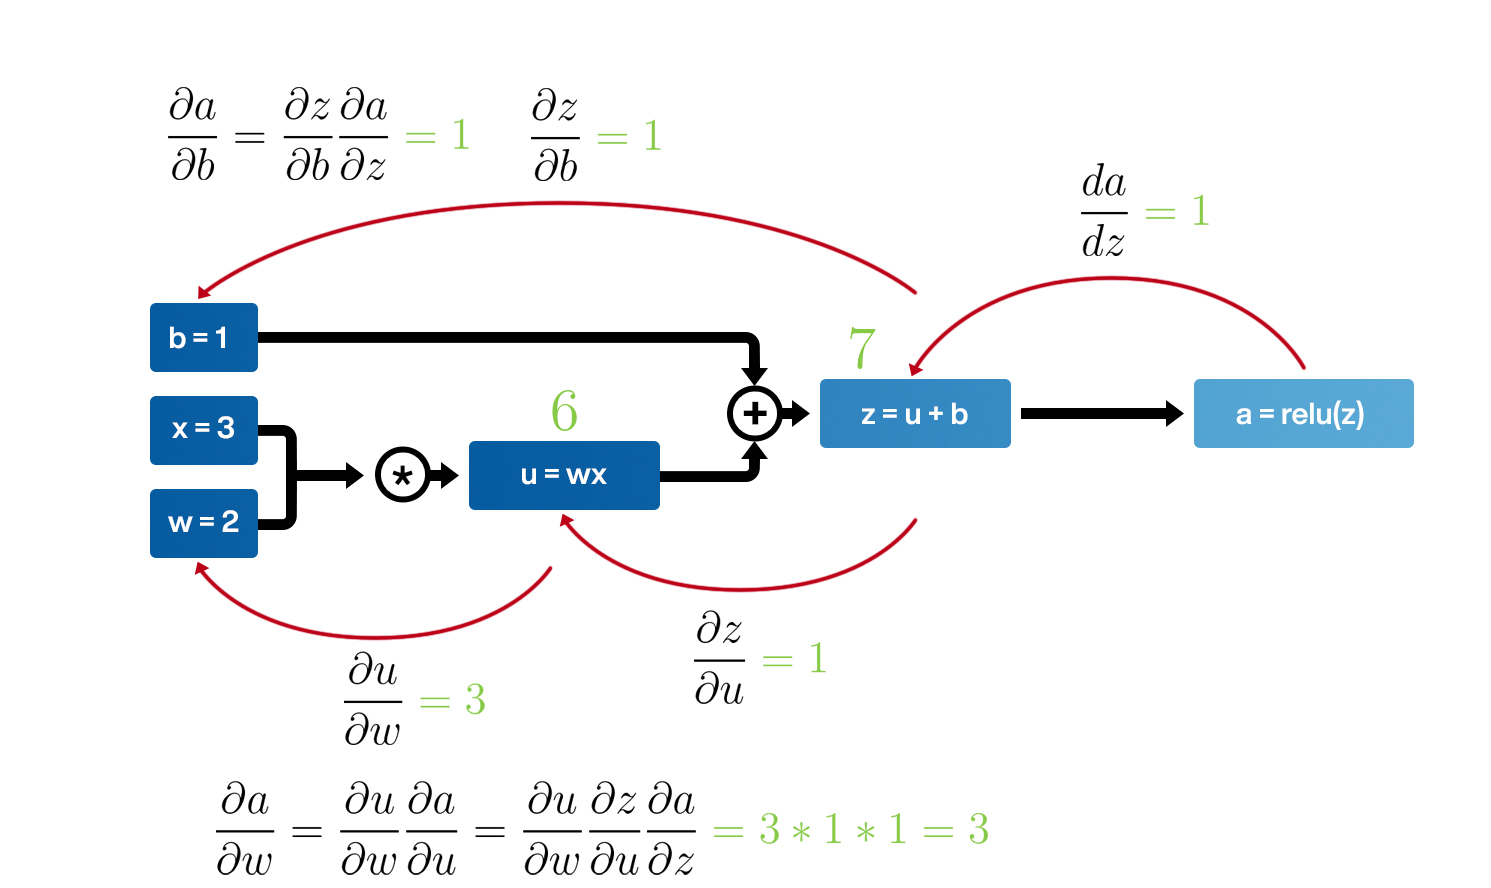

### Automatic differentiation in PyTorch

<code>**Autograd example**</code> 

In [ ]:
import torch
import torch.autograd as grad
import torch.nn.functional as F

Suppose we have this function computation graph

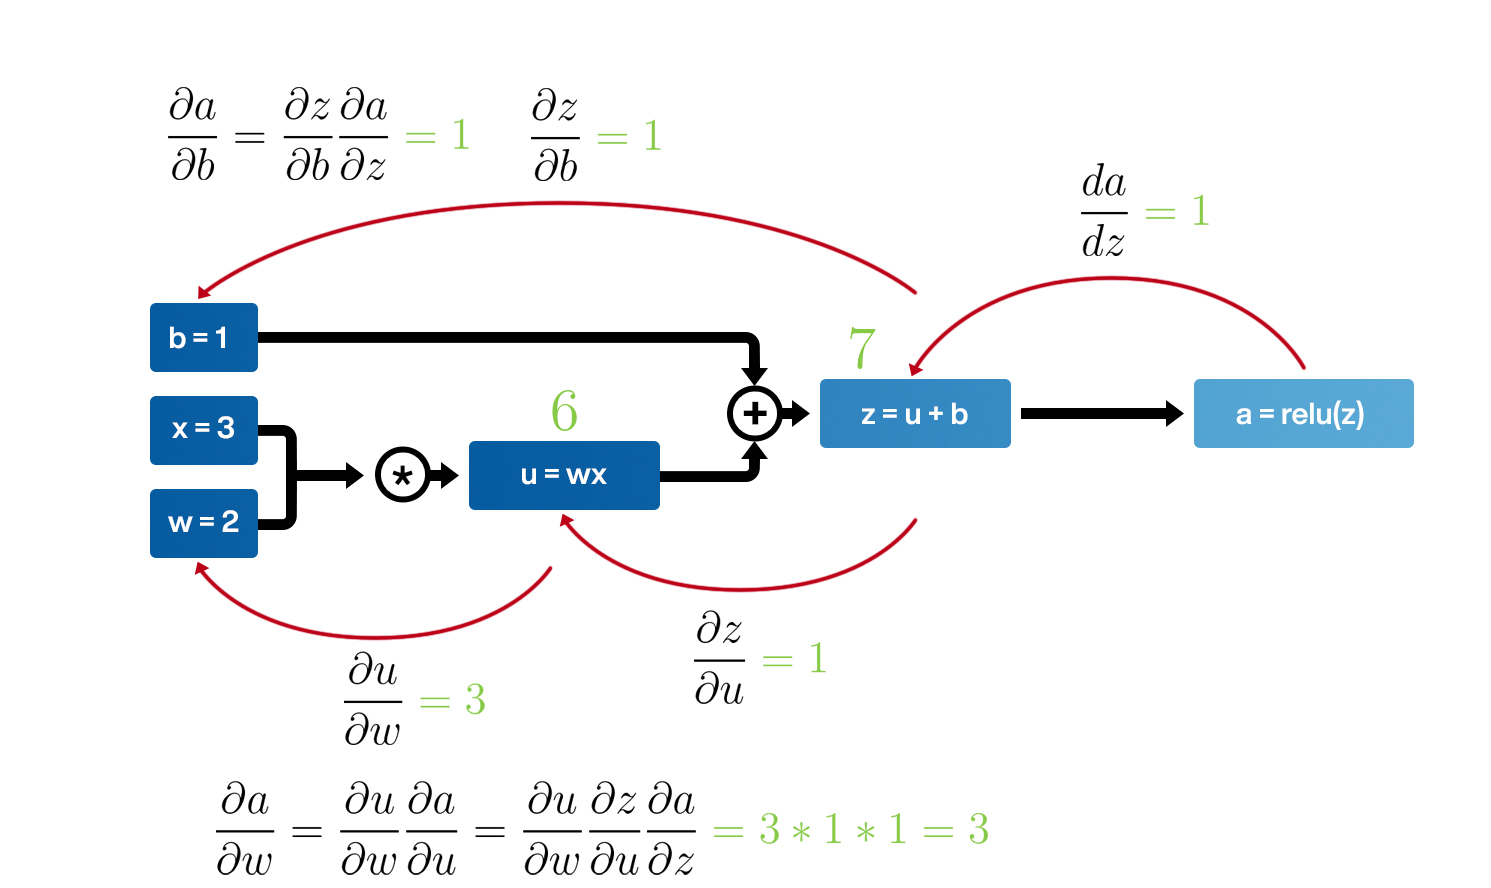

In PyTorch the function is defined and computed as follows:

<code>**requires_grad=True**</code>attribute means we are interested in computing gradients.

In [ ]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
a = F.relu(x * w + b)

In [ ]:
a

By defautl, PyTorch will automatically build a computation graph in the background if variables have the parameter `required_grad=True` set. If new variables without parameter set to `True` are used in computation with a variable that has `required_grad=True`, these new variables will also automatically have gradients set to `True` (this simply means that gradients for these variables will be computed; it is wasteful to set it to `True` if we don't need that variable's gradient; for example we usually don't need the gradients of training inputs `x`).

Let's compute the derivatie of a with respect to w:

In [ ]:
grad(a, w, retain_graph=True)

Above the `retain_graph=True` means the computation graph will be kept in memory -- this is for example purposes so that we can use the `grad` function again below. In practive we ussualy want to free the computation graph in every round.

In [ ]:
grad(a, b)

In [ ]:
grad(a, b)

Note that PyTorch functions are usually more efficient, but we could also implement our own ReLU functions as shown below:

In [ ]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

def my_relu(z):
    if z > 0:
        return z
    else
        z[:] = 0.
        return z
    
a = my_relu(x * w + b)
a

Note that even though the derivative of ReLU is not defined at 0, PyTorch autograd will do soemthing that is reasonable for practical pursposes:

In [ ]:
x = torch.tensor([-1])
w = torch.tensor([ 2.], requires_grad=True)
b = torch.tensor([ 1.], requires_grad=True)

def my_relu(z):
    if z > 0:
        return z
    else
        z[:] = 0.
        return z
    
a = F.relu(X * w + b)
grad(a, w, retain_graph=False)